In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\List of Countries by Sugarcane Production.csv")

In [5]:
data

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [7]:
df=data.copy()

In [8]:
df['Production (Tons)']=df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [9]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [12]:
df[df['Acreage (Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [13]:
df.shape

(103, 7)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

In [16]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [17]:
df=df.reset_index()

In [18]:
df

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [19]:
df.drop(['index', 'Unnamed: 0'], axis=1, inplace=True)

In [20]:
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [21]:
df['Production (Tons)']=df['Production (Tons)'].astype('float')
df['Production per Person (Kg)']=df['Production per Person (Kg)'].astype('float')
df['Acreage (Hectare)']=df['Acreage (Hectare)'].astype('float')
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     102 non-null    object 
 1   Continent                   102 non-null    object 
 2   Production (Tons)           102 non-null    float64
 3   Production per Person (Kg)  102 non-null    float64
 4   Acreage (Hectare)           102 non-null    float64
 5   Yield (Kg / Hectare)        102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.9+ KB


In [23]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


In [24]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

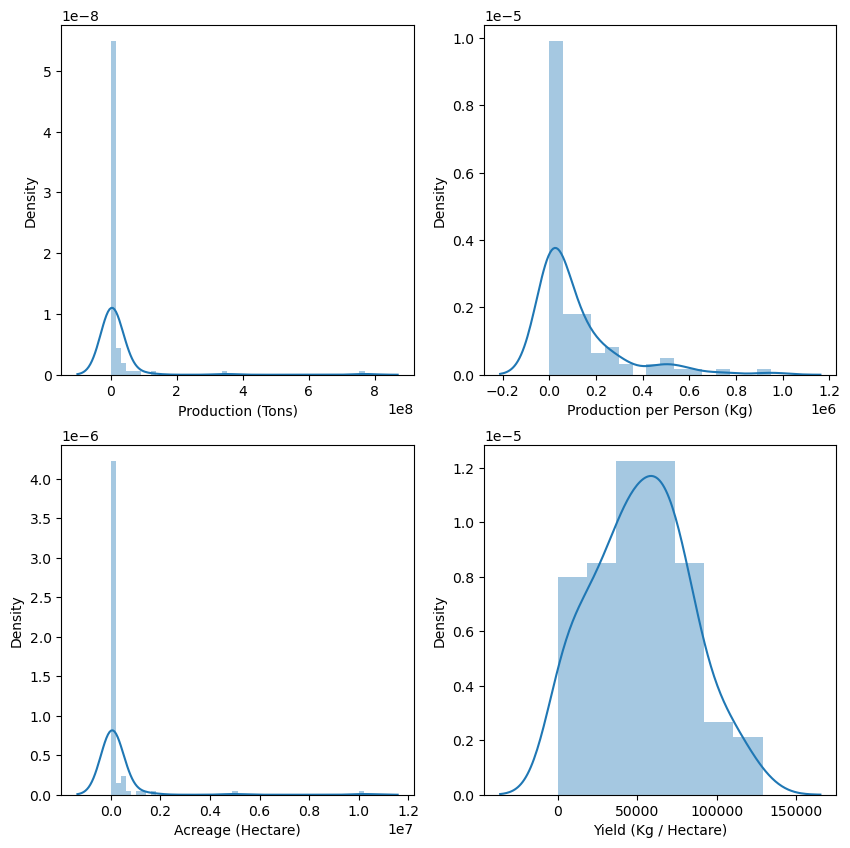

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.distplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.distplot(df['Acreage (Hectare)'])
plt.subplot(2,2,4)
sns.distplot(df['Yield (Kg / Hectare)'])
plt.show()

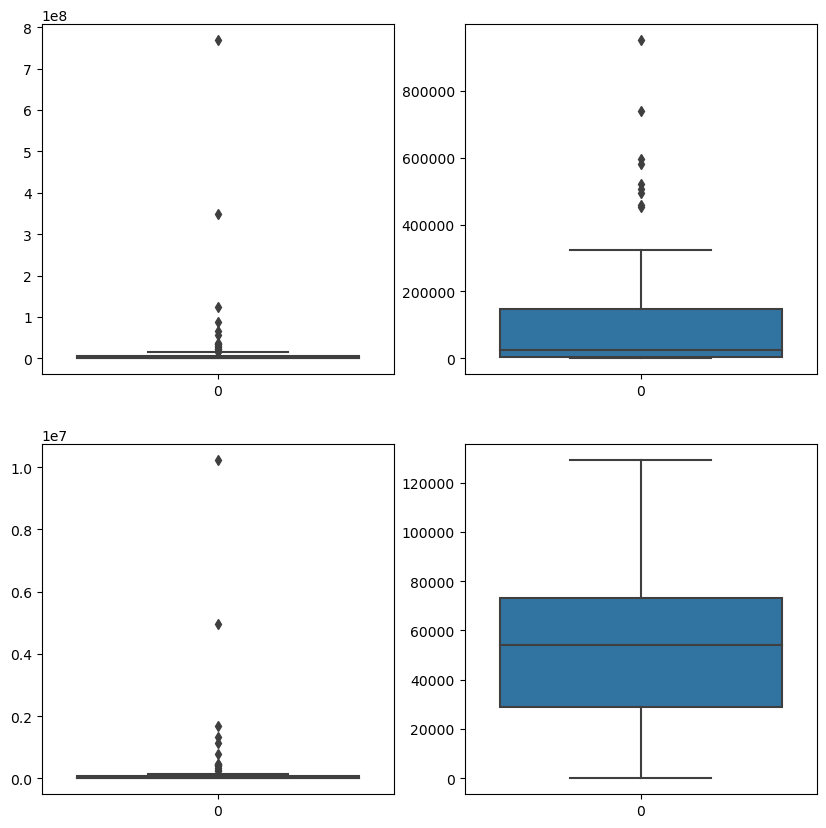

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production (Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production per Person (Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage (Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield (Kg / Hectare)'])
plt.show()

In [27]:
df.corr()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

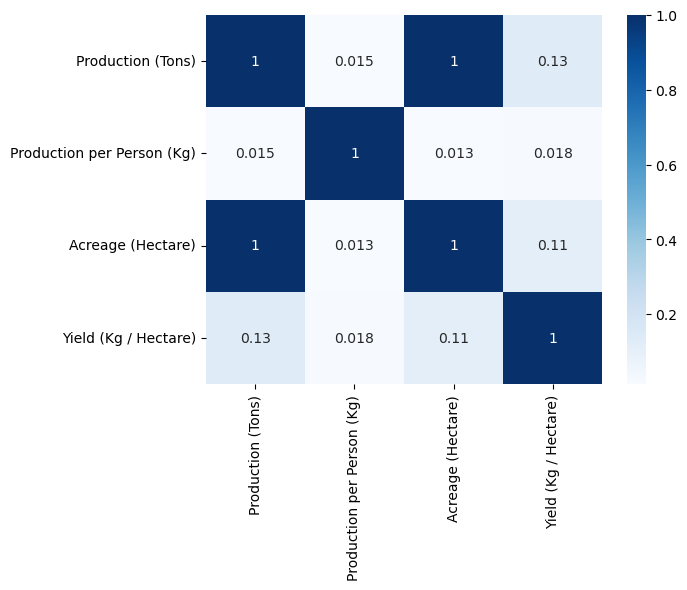

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [29]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


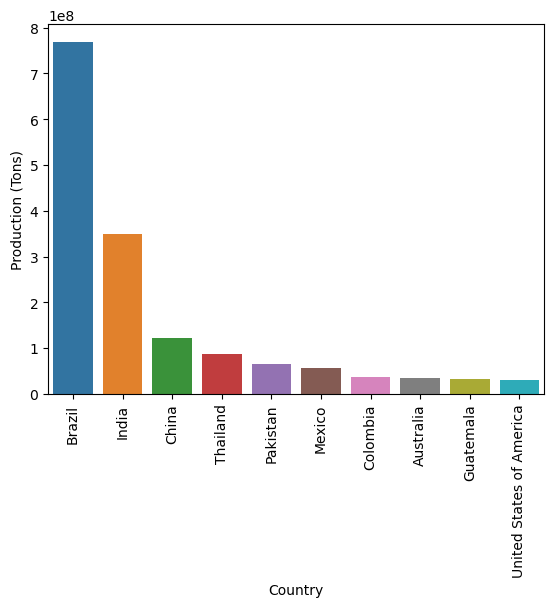

In [30]:
ax=sns.barplot(df, x=df['Country'].head(10), y=df['Production (Tons)'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

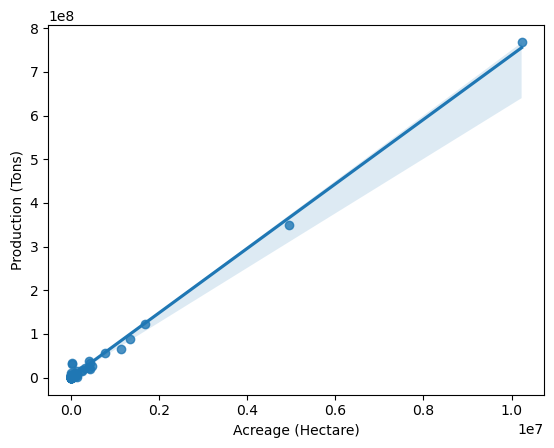

In [31]:
sns.regplot(df, y=df['Production (Tons)'], x=df['Acreage (Hectare)'])

In [32]:
df.groupby('Continent').mean()['Acreage (Hectare)'].sort_values(ascending=False)

Continent
South America    1.033567e+06
Asia             4.243328e+05
Oceania          1.227272e+05
North America    7.190832e+04
Africa           3.787076e+04
Europe           3.550000e+01
Name: Acreage (Hectare), dtype: float64

In [33]:
df_new=df[['Country', 'Production (Tons)']].set_index('Country')

In [34]:
df_new.head()

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0


<Axes: ylabel='Production (Tons)'>

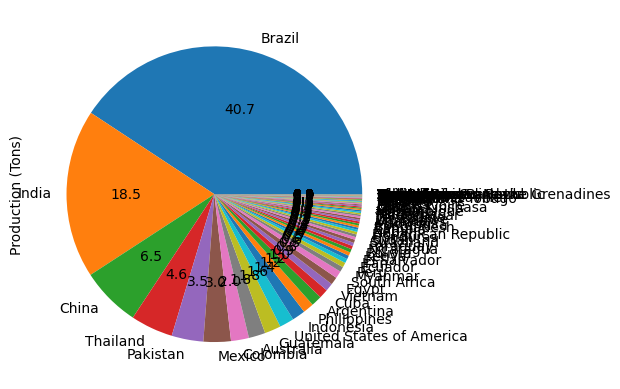

In [35]:
df_new['Production (Tons)'].plot(kind='pie', autopct='%.1f')

In [36]:
df1=pd.DataFrame(df.groupby('Country').mean()['Yield (Kg / Hectare)'].sort_values(ascending=False))
df1

,Yield (Kg / Hectare)
Country,
Guatemala,129049.3
Senegal,118085.3
Egypt,115030.6
Peru,112120.2
Malawi,107629.5
...,...
Saint Lucia,80.0
Trinidad and Tobago,54.0
Singapore,25.0


<Axes: xlabel='Country'>

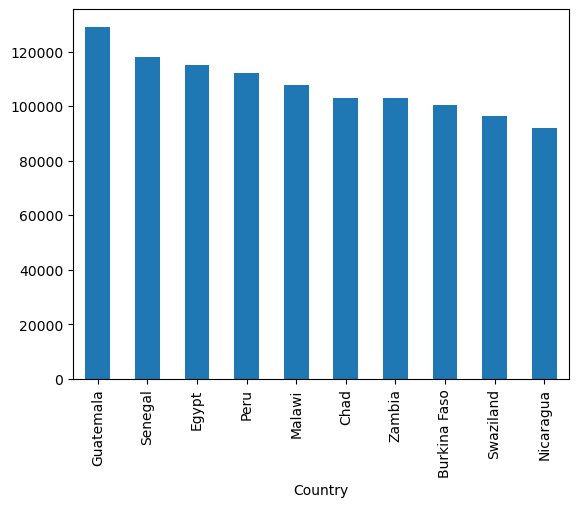

In [37]:
df1['Yield (Kg / Hectare)'].head(10).plot(kind='bar')

In [38]:
df_continent=df.groupby('Continent').sum()

In [39]:
df_continent

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1
South America,865588126.0,3505531.738,11369236.0,677192.7


In [40]:
df_continent['Number of Countries']=df.groupby('Continent').count()['Country']

In [41]:
df_continent

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Number of Countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


<Axes: >

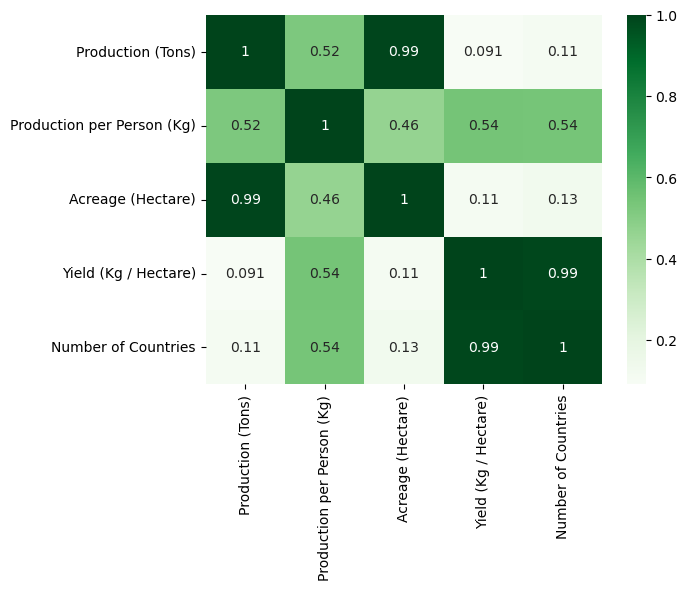

In [42]:
sns.heatmap(df_continent.corr(), annot=True, cmap='Greens')

<Axes: ylabel='Production (Tons)'>

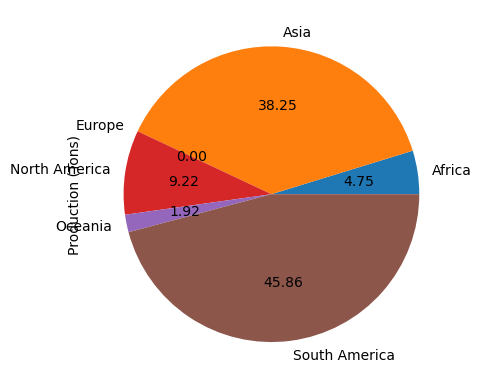

In [43]:
df_continent['Production (Tons)'].plot(kind='pie', autopct='%.2f')